# Customer Complaint

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [2]:
df = pd.read_csv('complaint.xls')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


## About Dataset:

- **Ticket # :** A unique ID generated for each complaint
- **Customer Complaint :** Written complaint of the customer
- **Date :** date of complaint filing
- **Date_month_yea :** Date of the complaint filing in different format
- **Time :** Time of complaint filing
- **Received Via :** Medium of filing complaint which is either via Internet or Customer care
- **City :** City where the customer has faced the issue
- **State :** State where the customer has faced the issue
- **Zip Code :** Zip code of area where the customer has faced the issue
- **Status :** Status of the complaint from the side of firm
- **Filing on Behalf of Someone :** Whether the customer filed the complaint for himself/herself or on behalf of someone else

In [3]:
df.shape

(2077, 11)

Solved     904
Closed     686
Open       338
Pending    149
Name: Status, dtype: int64


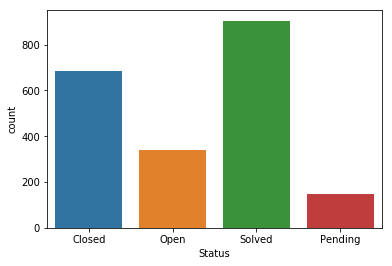

In [7]:
print(df['Status'].value_counts())
sns.countplot(x='Status', data=df)

**Percent wise distributio of complaint status**
- Closed : 33.17%
- Open : 16.27%
- Solved : 43.52%
- Pending : 7.17%

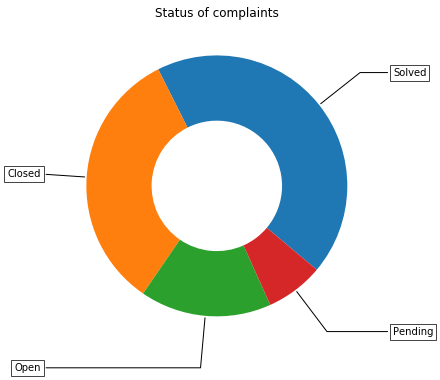

In [8]:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

y_value_counts = df['Status'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Solved","Closed", "Open","Pending"]

data = [y_value_counts[0], y_value_counts[1], y_value_counts[2], y_value_counts[3]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Status of complaints")

plt.show()

In [11]:
df['Customer Complaint'].nunique()

1783

In [12]:
df['Received Via'].nunique()

2

In [19]:
df.groupby(['Received Via','Status']).count()

Ticket #  Customer Complaint  Date  \
Received Via       Status                                        
Customer Care Call Closed        367                 367   367   
                   Open          176                 176   176   
                   Pending        65                  65    65   
                   Solved        445                 445   445   
Internet           Closed        319                 319   319   
                   Open          162                 162   162   
                   Pending        84                  84    84   
                   Solved        459                 459   459   

                            Date_month_year  Time  City  State  Zip code  \
Received Via       Status                                                  
Customer Care Call Closed               367   367   367    367       367   
                   Open                 176   176   176    176       176   
                   Pending               65    65    65     65        65   
                   Solved               445   445   445    445       445   
Internet           Closed               319   319   319    319       319   
                   Open                 162   162   162    162       162   
                   Pending               84    84    84     84        84   
                   Solved               459   459   459    459       459   

                            Filing on Behalf of Someone  
Received Via       Status                                
Customer Care Call Closed                           367  
                   Open                             176  
                   Pending                           65  
                   Solved                           445  
Internet           Closed                           319  
                   Open                             162  
                   Pending                           84  
                   Solved                           459

# Univariate Analysis

In [25]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='Status', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Complaints')
    plt.title('% of projects solved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'solved'))
    plt.show()

In [47]:
def univariate_barplots(data, col1, col2='Status', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq('Solved').sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    #temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    temp = temp.rename(columns={'Status':'Solved'})
    temp['Percent_Solved'] = (temp['Solved']/temp['total'])*100
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2='Solved', col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

## State

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


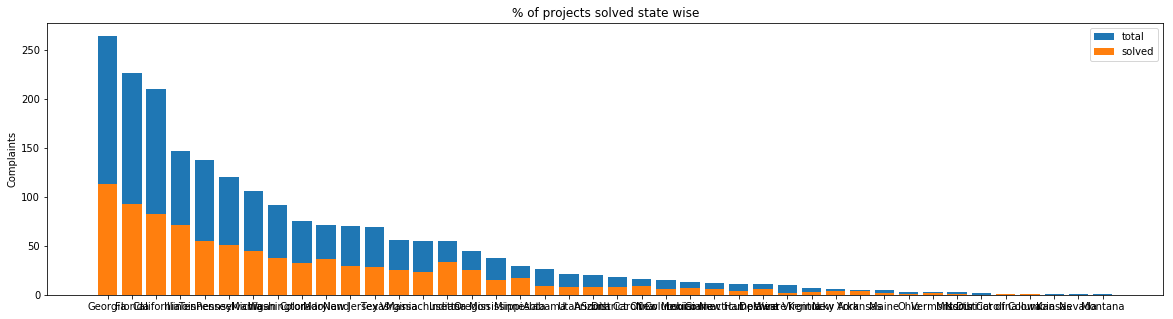

         State  Solved  total  Percent_Solved
10     Georgia     113    264       42.803030
9      Florida      93    226       41.150442
3   California      82    210       39.047619
11    Illinois      71    147       48.299320
35   Tennessee      55    137       40.145985
                   State  Solved  total  Percent_Solved
8   District of Columbia       1      1           100.0
13                  Iowa       1      1           100.0
14                Kansas       0      1             0.0
25                Nevada       0      1             0.0
24               Montana       0      1             0.0


In [48]:
import sys
univariate_barplots(df, 'State', 'Status', False)

**The plot shows the state wise distribution of totala complaints and percentage of complaints solved.**
- Georgia has received the maximum number of complaints which is 264 followed by Florida (226), California (210), Illinois (147), Tennessee (137) etc.
- There are quite a few states with Lowest complaint as 1.


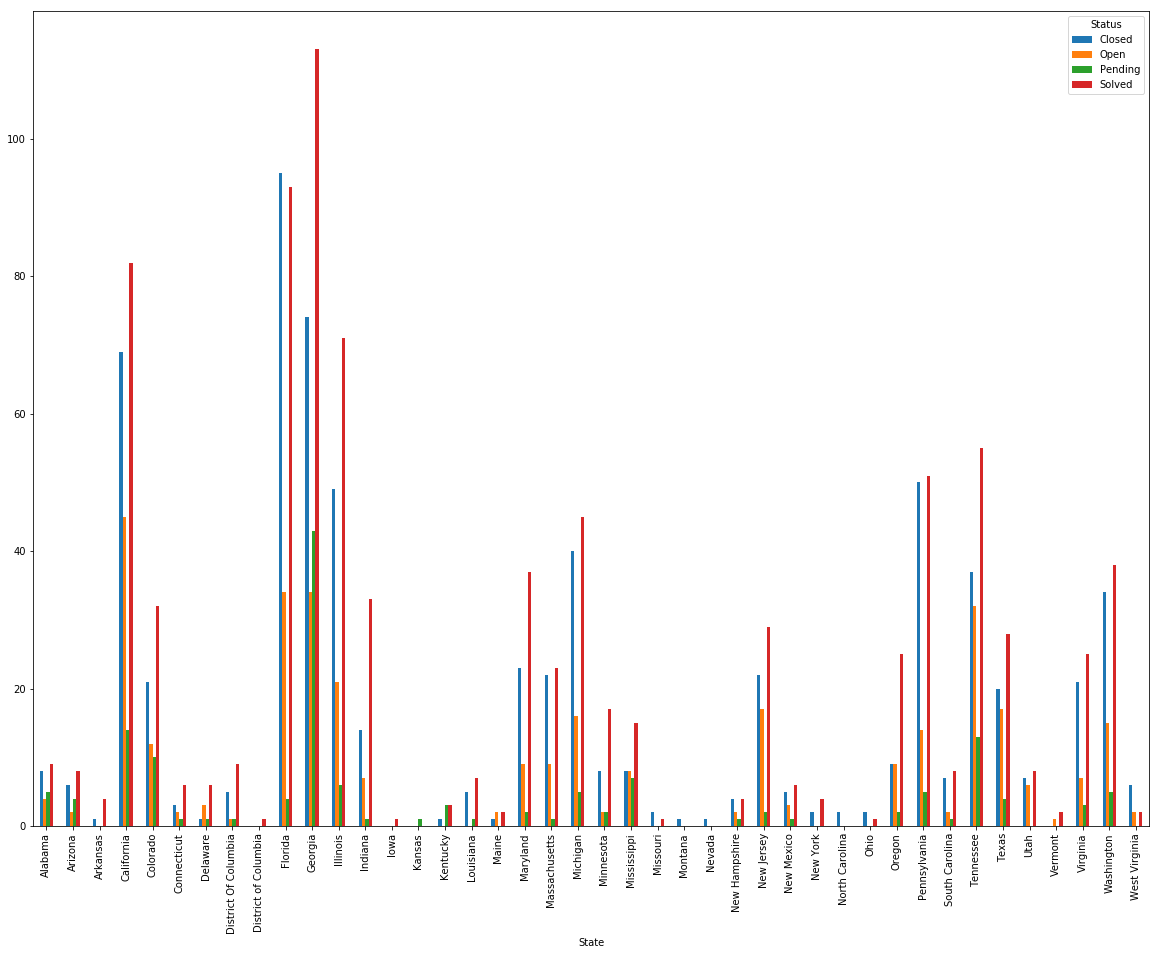

In [24]:
fig, ax = plt.subplots(figsize = (20,15))
df.groupby(['State','Status']).count()['Ticket #'].unstack().plot.bar(ax=ax)
                       

**This plot shows the distribution of 'Status' of complaints in each state.**
- We can see majority of the states have complaints with all the possible four status.
- But there are a few states like District of columbia, Iowa, Kansas, Missouri, Nevada etc where complaints are not distributed between all four status.
- The heights of the red bars tell that Georgia has most of the solved complaints followed by Florida, California.

## City

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


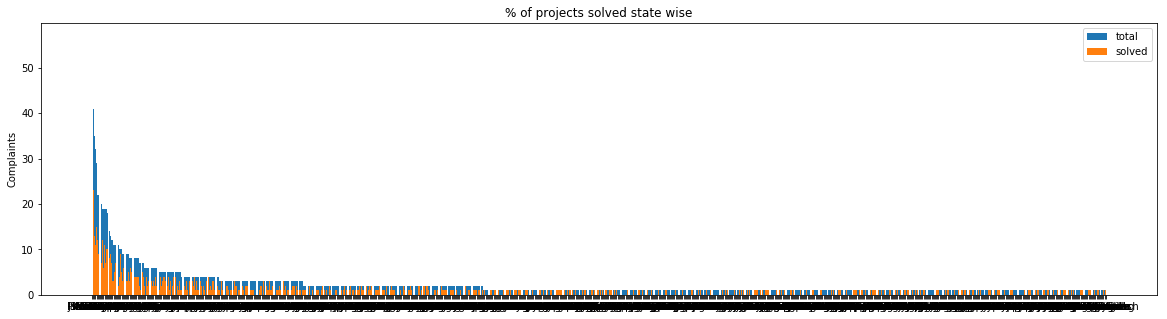

             City  Solved  total  Percent_Solved
25        Atlanta      27     57       47.368421
131       Chicago      23     41       56.097561
405     Knoxville      13     35       37.142857
359       Houston      11     32       34.375000
376  Jacksonville      15     29       51.724138
            City  Solved  total  Percent_Solved
362  Hughesville       0      1             0.0
364   Huntington       0      1             0.0
366       Huston       1      1           100.0
367        Hydes       0      1             0.0
446   Lonaconing       1      1           100.0


In [49]:
univariate_barplots(df, 'City', 'Status', False)

**The plot shows the city wise distribution of total complaints and percentage of complaints solved.**
- Although the plot is not clear enough to distinguish between the cities, but the data printed shows some information.
- Atlanta has received the maximum number of complaints which is 57 followed by Chicago (41), Knoxville (35), Houston (32), Jacksonville (29) etc.
- There are quite a few cities with Lowest complaint as 1.


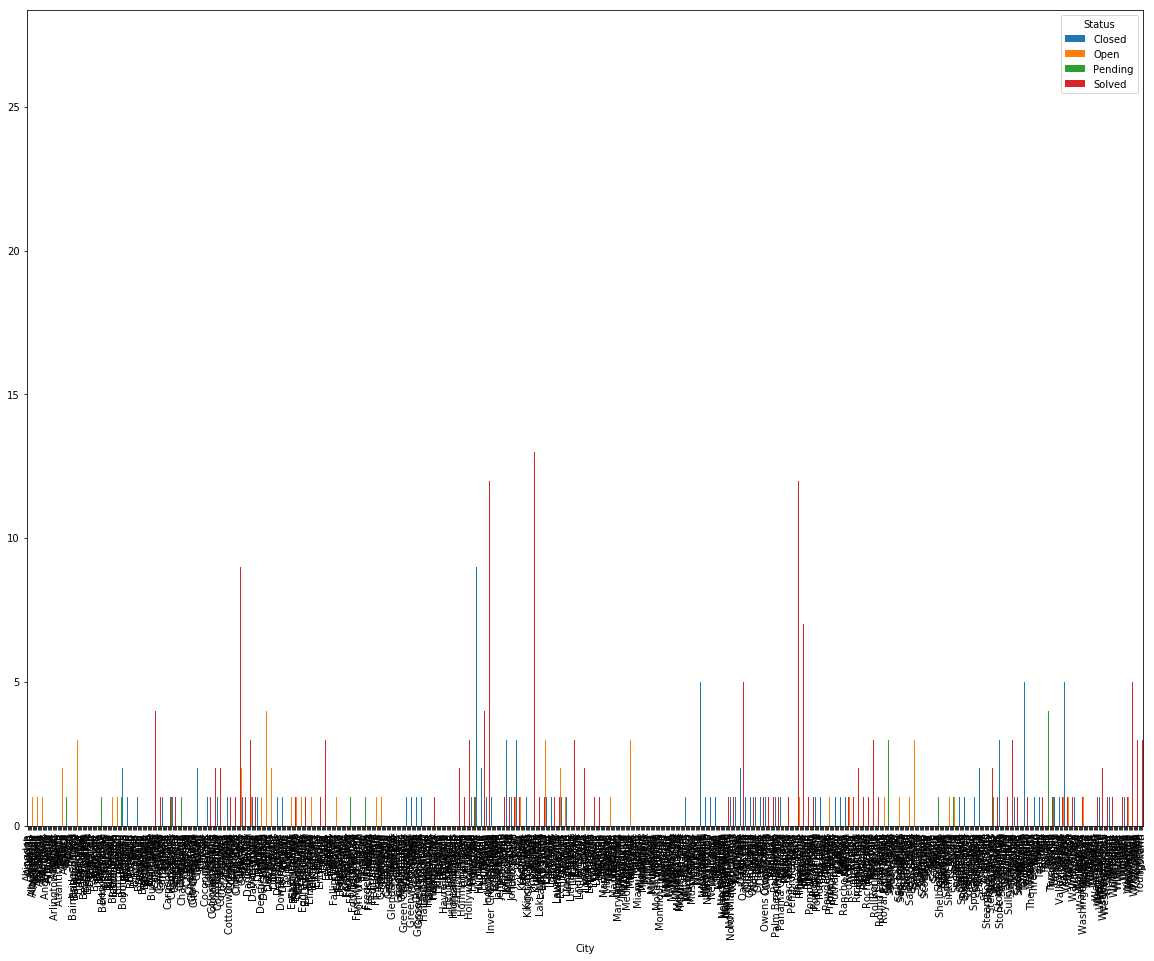

In [40]:
fig, ax = plt.subplots(figsize = (20,15))
df.groupby(['City','Status']).count()['Ticket #'].unstack().plot.bar(ax=ax)

**This plot of distribution of status of complaints for each city does not help at all because of too much traffic of data.**

## Filing on Behalf of Someone

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


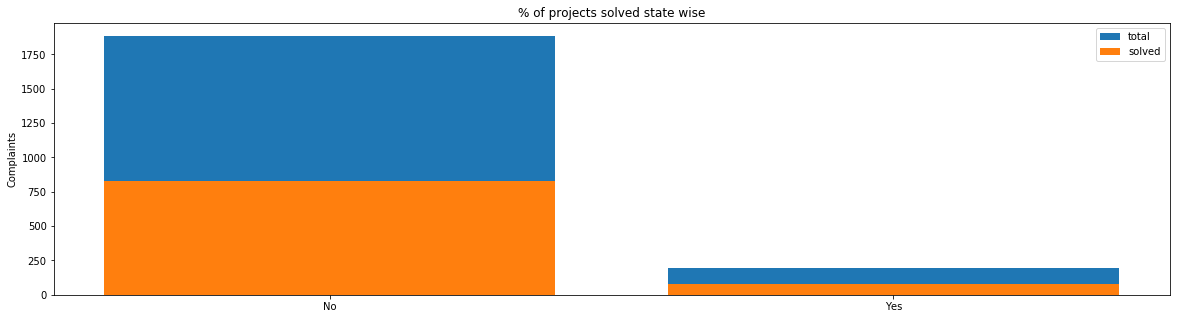

  Filing on Behalf of Someone  Solved  total  Percent_Solved
0                          No     825   1884       43.789809
1                         Yes      79    193       40.932642
  Filing on Behalf of Someone  Solved  total  Percent_Solved
0                          No     825   1884       43.789809
1                         Yes      79    193       40.932642


In [50]:
univariate_barplots(df, 'Filing on Behalf of Someone', 'Status', False)

**The plot shows the distribution of total complaints and percentage of complaints solved based on the fact that whether the complaint was filed on behalf of someone or not.**
- 90.7% of the complaints (1884 out of 2077 complaints) were filed on self behalf, not on someone else's behalf.
- The chance of complaint being solved if it is filed on behalf of someone else is lower by almost 3%.
- So one can say that probability of complaint getting solved will be more if you file your complaint by yourself.


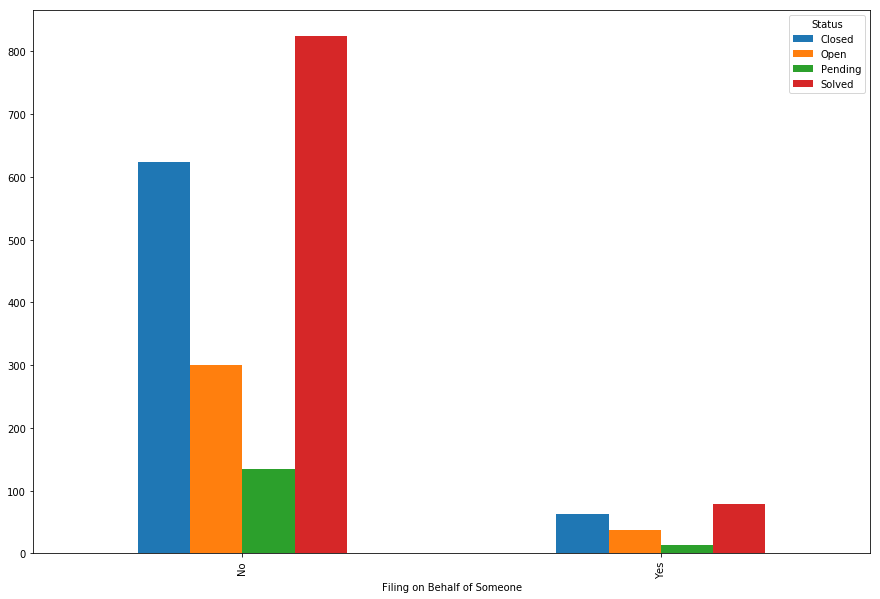

In [52]:
fig, ax = plt.subplots(figsize = (15,10))
df.groupby(['Filing on Behalf of Someone','Status']).count()['Ticket #'].unstack().plot.bar(ax=ax)

**This plot of distribution of status of complaints on the basis of whether it was filed on behalf of someone else does not help much.**

## Received Via

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


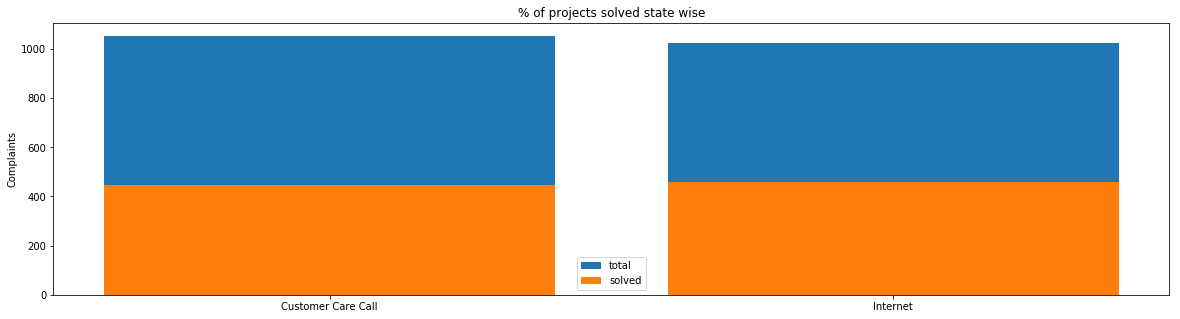

         Received Via  Solved  total  Percent_Solved
0  Customer Care Call     445   1053       42.260209
1            Internet     459   1024       44.824219
         Received Via  Solved  total  Percent_Solved
0  Customer Care Call     445   1053       42.260209
1            Internet     459   1024       44.824219


In [53]:
univariate_barplots(df, 'Received Via', 'Status', False)

**The above plot shows the distribution of total complaints and percentage of complaints solved based on the fact that whether the complaint was filed via Internet or customer care call.**
- Almost equal complaints are filed via both the mediums.
- The chance of complaint being solved if it is filed via customer care call is lower by almost 2.5%.
- So one can say that probability of complaint getting solved will be more if you file your complaint via Internet rather than customer care call.


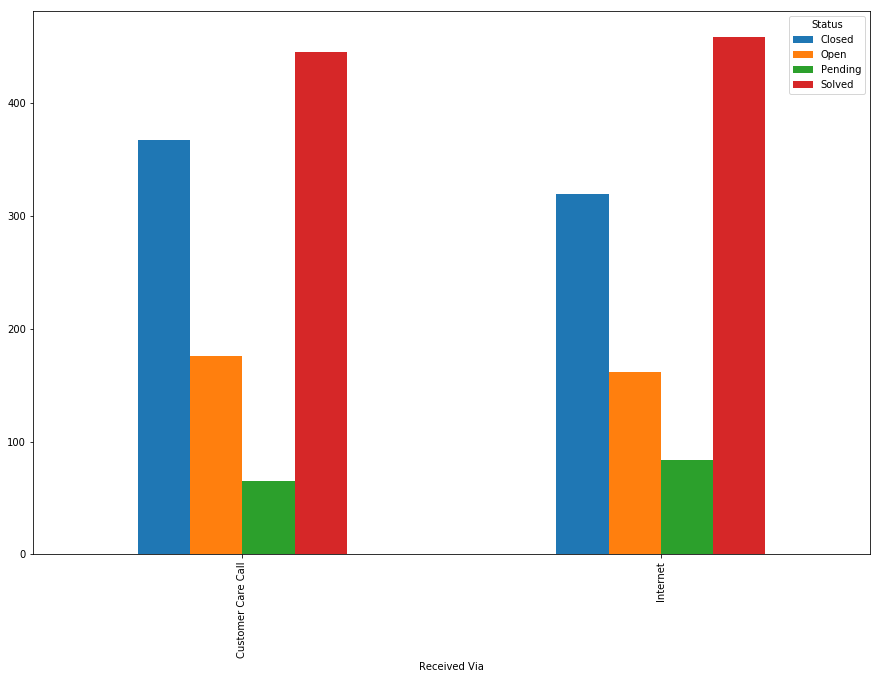

In [54]:
fig, ax = plt.subplots(figsize = (15,10))
df.groupby(['Received Via','Status']).count()['Ticket #'].unstack().plot.bar(ax=ax)

### Datetime analysis

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 11 columns):
Ticket #                       2077 non-null object
Customer Complaint             2077 non-null object
Date                           2077 non-null object
Date_month_year                2077 non-null object
Time                           2077 non-null object
Received Via                   2077 non-null object
City                           2077 non-null object
State                          2077 non-null object
Zip code                       2077 non-null int64
Status                         2077 non-null object
Filing on Behalf of Someone    2077 non-null object
dtypes: int64(1), object(10)
memory usage: 178.6+ KB


In [4]:
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,2015
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,2015
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015


## Day

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


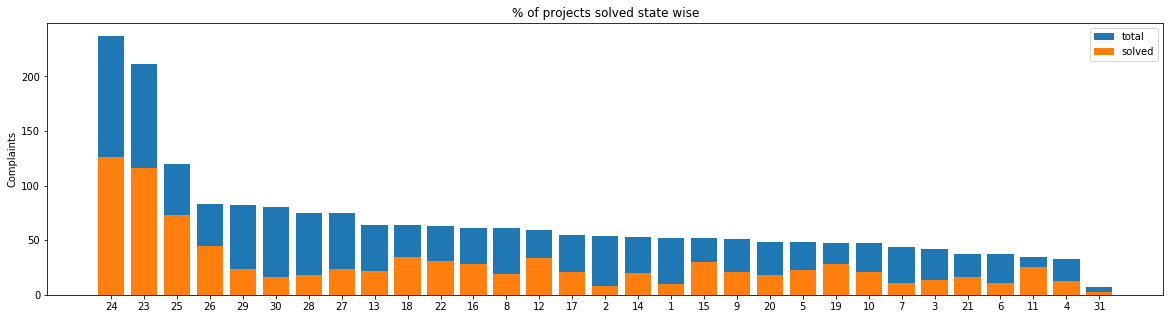

    Day  Solved  total  Percent_Solved
23   24     126    237       53.164557
22   23     116    211       54.976303
24   25      73    120       60.833333
25   26      45     83       54.216867
28   29      24     82       29.268293
    Day  Solved  total  Percent_Solved
20   21      16     37       43.243243
5     6      11     37       29.729730
10   11      25     35       71.428571
3     4      13     33       39.393939
30   31       3      7       42.857143


In [63]:
univariate_barplots(df, 'Day', 'Status', False)

**The above plot shows the distribution of total complaints and percentage of complaints solved based on the 'Day' of the filing the complaint.**
- There is a very peculiar observation that on days 24,23,25 there are a lot of complaints.
- On 31st, the complaints are very few, just 7.
- Rest of the days have well distrbiuted complaints.

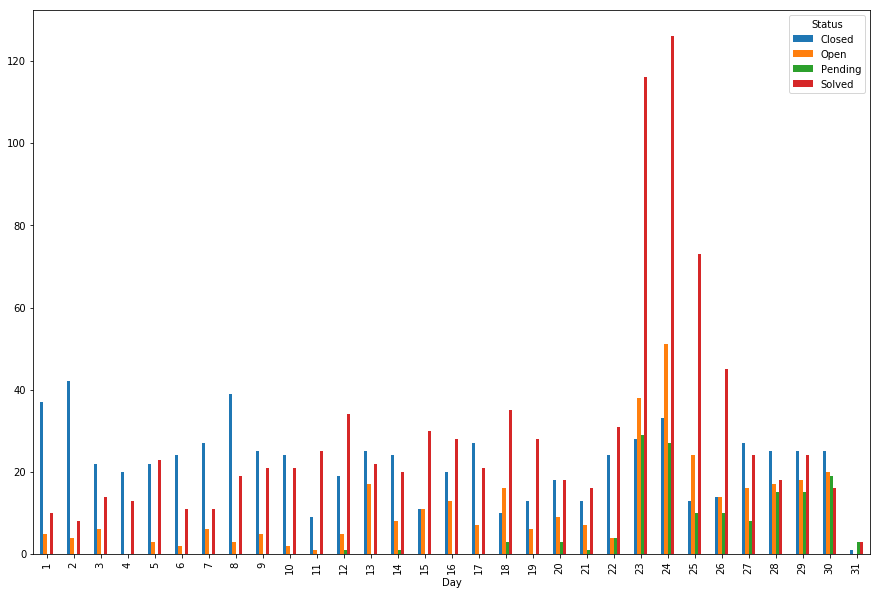

In [64]:
fig, ax = plt.subplots(figsize = (15,10))
df.groupby(['Day','Status']).count()['Ticket #'].unstack().plot.bar(ax=ax)

##### In starting days (1,2,3..) of the month, the probability of complaint being closed is higher but there is a sudden unusual peak of solved complaints on 23rd, 24th, 25th. So if the complaint is filed on 23rd, 24th, 25th the probabilty of being solved is much much higher.

### Month

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


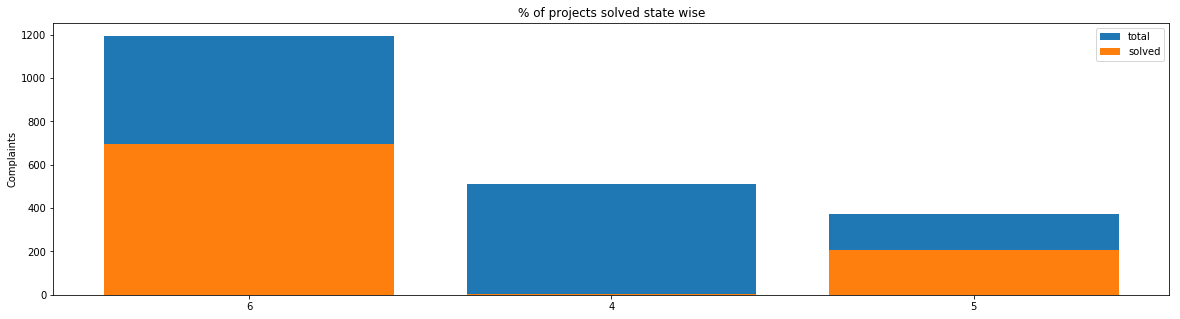

   Month  Solved  total  Percent_Solved
2      6     694   1194       58.123953
0      4       5    510        0.980392
1      5     205    373       54.959786
   Month  Solved  total  Percent_Solved
2      6     694   1194       58.123953
0      4       5    510        0.980392
1      5     205    373       54.959786


In [65]:
univariate_barplots(df, 'Month', 'Status', False)

**The above plot shows the distribution of total complaints and percentage of complaints solved based on the 'Month' of the complaint filing.**
- It seems like the most busiest month is June (6) as majority of the complaint filing is beind done in this month.
- April has a probability of 0.0098 of complaint getting solved.
- So it is a bad idea to file complaint in April ofcourse.
- Complaint filed in June and May have good probabilities, 0.58 & 0.54, for being solved.


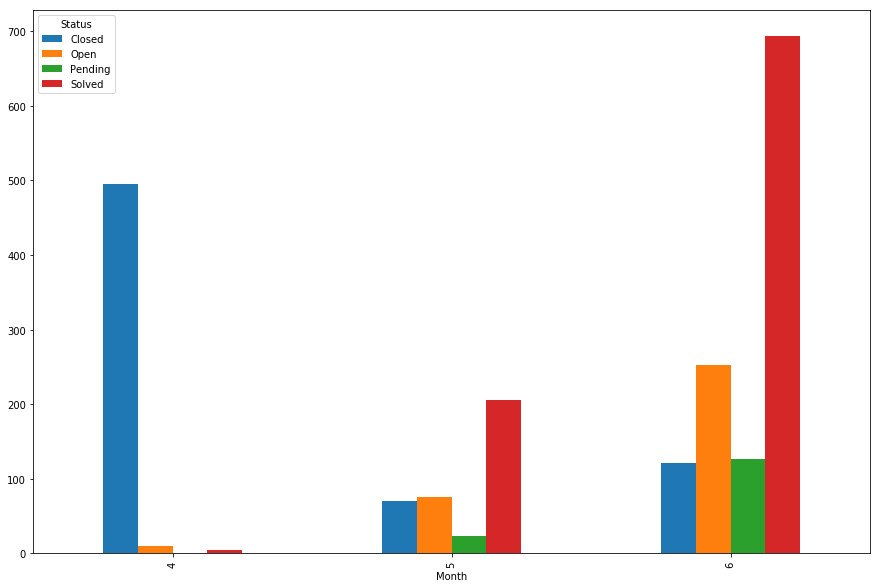

In [66]:
fig, ax = plt.subplots(figsize = (15,10))
df.groupby(['Month','Status']).count()['Ticket #'].unstack().plot.bar(ax=ax)

##### Conclusion: If the month is June (06), then there is a high probability of complaint being solved.

### Year

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


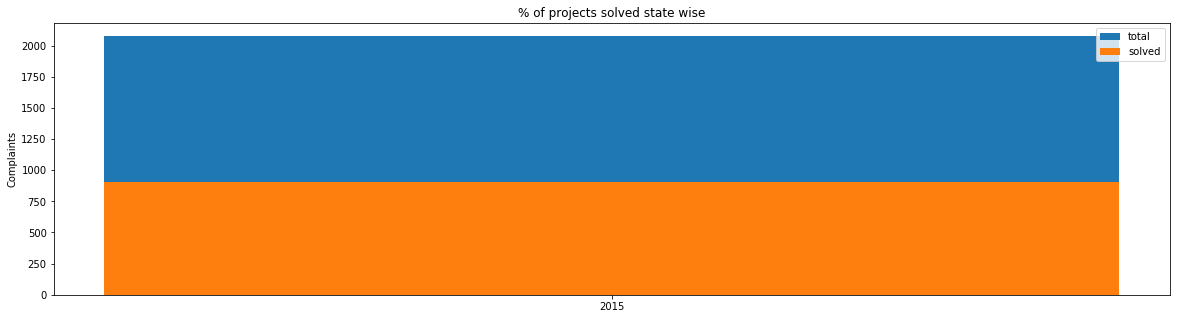

   Year  Solved  total  Percent_Solved
0  2015     904   2077       43.524314
   Year  Solved  total  Percent_Solved
0  2015     904   2077       43.524314


In [67]:
univariate_barplots(df, 'Year', 'Status', False)

##### All the complaints are of the same year. So, this feature is useless.

### Customer Complaint

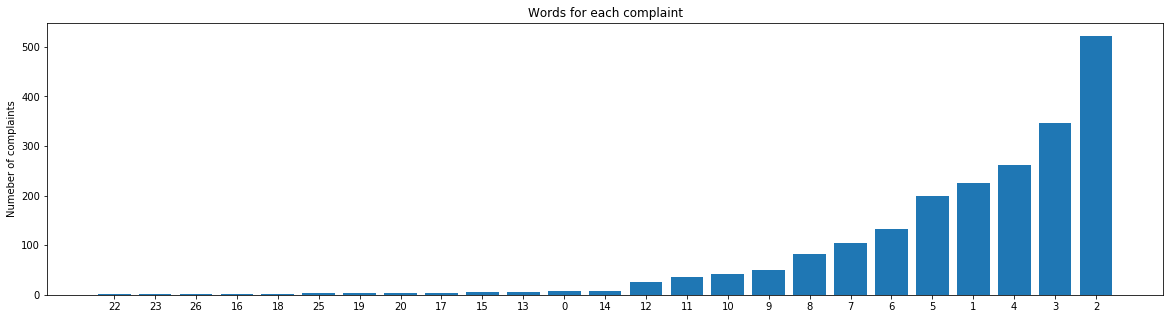

In [70]:
#https://stackoverflow.com/a/37483537/4084039
word_count = df['Customer Complaint'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of complaints')
plt.title('Words for each complaint')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

**The above plot is word count for each complaint vs number of complaint**
- Majority of the complaints, almost around 24% of complaint, have just two words in it.
- There are really very few complaints which is very descriptive and lengthy.


D:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


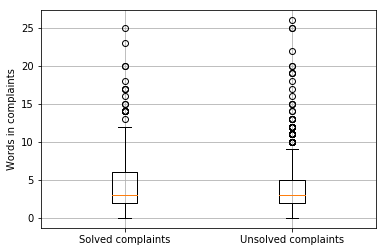

In [72]:
solved_word_count = df[df['Status']=='Solved']['Customer Complaint'].str.split().apply(len)
solved_word_count = solved_word_count.values

unsolved_word_count = df[df['Status']!='Solved']['Customer Complaint'].str.split().apply(len)
unsolved_word_count = unsolved_word_count.values

# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([solved_word_count, unsolved_word_count])
plt.xticks([1,2],('Solved complaints','Unsolved complaints'))
plt.ylabel('Words in complaints')
plt.grid()
plt.show()

**Above plot shows the box plots of solved and unsolved complaints with respect to word counts in each complaint**
- The box plots are overlapping is most regions.
- The median of the word counts per complaint for both solved and unsolved is approx same.
- Solved complaints have slightly more word counts whereas unsolved complaints have more  outliers.

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


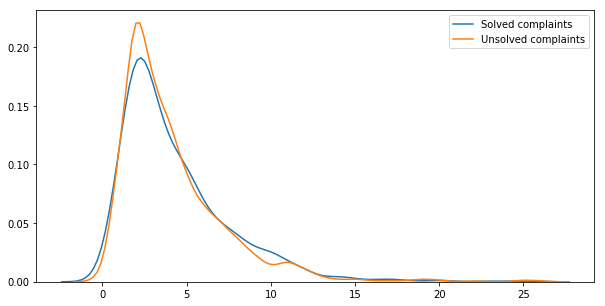

In [74]:
plt.figure(figsize=(10,5))
sns.distplot(solved_word_count, hist=False, label="Solved complaints")
sns.distplot(unsolved_word_count, hist=False, label="Unsolved complaints")
plt.legend()
plt.show()

**The PDFs of both solved and unsolved complains word counts overlaps. So no usefull informatiton.**

## Percentage of unresolved complaints

In [78]:
solved_complaints = df[df['Status']=='Solved']['State'].value_counts()
solved_complaints

Georgia                 113
Florida                  93
California               82
Illinois                 71
Tennessee                55
Pennsylvania             51
Michigan                 45
Washington               38
Maryland                 37
Indiana                  33
Colorado                 32
New Jersey               29
Texas                    28
Oregon                   25
Virginia                 25
Massachusetts            23
Minnesota                17
Mississippi              15
District Of Columbia      9
Alabama                   9
South Carolina            8
Utah                      8
Arizona                   8
Louisiana                 7
Delaware                  6
New Mexico                6
Connecticut               6
New Hampshire             4
New York                  4
Arkansas                  4
Kentucky                  3
Vermont                   2
Maine                     2
West Virginia             2
Ohio                      1
Missouri            

In [80]:
unresolved_complaints = total_complaints - solved_complaints

In [82]:
unresolved_complaints.sort_values()

District of Columbia      0.0
Iowa                      0.0
Arkansas                  1.0
Vermont                   1.0
Missouri                  2.0
Ohio                      2.0
New York                  2.0
Maine                     3.0
Kentucky                  4.0
Delaware                  5.0
Connecticut               6.0
Louisiana                 6.0
New Hampshire             7.0
District Of Columbia      7.0
West Virginia             8.0
New Mexico                9.0
South Carolina           10.0
Arizona                  12.0
Minnesota                12.0
Utah                     13.0
Alabama                  17.0
Oregon                   20.0
Indiana                  22.0
Mississippi              23.0
Virginia                 31.0
Massachusetts            32.0
Maryland                 34.0
Texas                    41.0
New Jersey               41.0
Colorado                 43.0
Washington               54.0
Michigan                 61.0
Pennsylvania             69.0
Illinois  

In [96]:
df_com = pd.DataFrame(total_complaints)
#df_com2 = pd.DataFrame(total_complaints)
df_com = df_com.merge(unresolved_complaints,left_index =True, right_index=True)
df_com = df_com.rename(columns={'State_x':'Total','State_y':'Unresolved'})
df_com['unresolve_percent'] = (df_com['Unresolved']/df_com['Total'])*100
df_com.head()

,Total,Unresolved,unresolve_percent
Georgia,264,151.0,57.196970
Florida,226,133.0,58.849558
California,210,128.0,60.952381
Illinois,147,76.0,51.700680
Tennessee,137,82.0,59.854015


In [98]:
df_com = df_com.dropna()
df_com.sort_values(by='unresolve_percent')

,Total,Unresolved,unresolve_percent
Iowa,1,0.0,0.000000
District of Columbia,1,0.0,0.000000
Arkansas,5,1.0,20.000000
Vermont,3,1.0,33.333333
New York,6,2.0,33.333333
Indiana,55,22.0,40.000000
Minnesota,29,12.0,41.379310
District Of Columbia,16,7.0,43.750000
Oregon,45,20.0,44.444444
Delaware,11,5.0,45.454545


### * Maximum unresolved percentage : "WEST VIRGIA" *
### * Minimum unresolved percentage : "IOWA" *

In [5]:
df = df.drop('Year',axis=1)

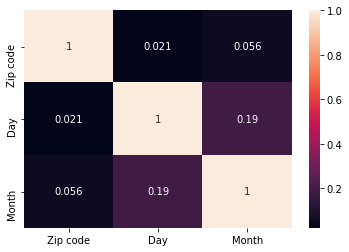

In [6]:
sns.heatmap(df.corr(),annot=True)

# Preprocessing

In [159]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5


In [7]:
import re
from nltk.corpus import stopwords
import pickle
from tqdm import tqdm
import os

### Received Via


In [8]:
df['Received Via'].value_counts()

Customer Care Call    1053
Internet              1024
Name: Received Via, dtype: int64

In [9]:
df['Received Via'] = df['Received Via'].str.replace(' ','_')

In [10]:
df['Received Via'].isnull().values.sum()

0

In [11]:
df['Received Via']

0       Customer_Care_Call
1                 Internet
2                 Internet
3                 Internet
4                 Internet
               ...        
2072    Customer_Care_Call
2073    Customer_Care_Call
2074    Customer_Care_Call
2075              Internet
2076    Customer_Care_Call
Name: Received Via, Length: 2077, dtype: object

### Customer complaint

In [12]:
from nltk.stem import PorterStemmer
import string

def remove_punct(x):
    s = [t for t in x if t not in string.punctuation]
    return ''.join(s)

def remove_stopwords(x):
    s = [t for t in x.split() if t.lower() not in stopwords.words('english')]
    return ' '.join(s)

df['Customer Complaint'] = df['Customer Complaint'].apply(remove_punct)
df['Customer Complaint'] = df['Customer Complaint'].apply(remove_stopwords)


In [13]:
df['Customer Complaint']

0                                Cable Internet Speeds
1           Payment disappear service got disconnected
2                                        Speed Service
3       Imposed New Usage Cap 300GB punishes streaming
4                                 working service boot
                             ...                      
2072           Speed throttling speeds promised output
2073                              Service Availability
2074                    Monthly Billing Returned Modem
2075                                 complaint comcast
2076                    Extremely unsatisfied customer
Name: Customer Complaint, Length: 2077, dtype: object

### Received Via

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [15]:
X = df.drop(['Status','Date','Date_month_year','Time'], axis=1)
y = df['Status']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.25, stratify = y)

# Featurize Encoding

### Customer complaint vectorization

In [16]:
vec = TfidfVectorizer().fit(X_train['Customer Complaint'].values)
X_train_cc = vec.transform(X_train['Customer Complaint'].values)
X_test_cc = vec.transform(X_test['Customer Complaint'].values)

print('X_train_customer_complaint shape', X_train_cc.shape)
print('X_test_customer_complaint shape', X_test_cc.shape)



X_train_customer_complaint shape (1557, 1235)
X_test_customer_complaint shape (520, 1235)


### City One Hot Encoding

In [17]:
vec2 = CountVectorizer()
vec2.fit(X_train['City'].values)
X_train_city = vec2.transform(X_train['City'].values)
X_test_city = vec2.transform(X_test['City'].values)



In [18]:
print('X_train_city shape', X_train_city.shape)
print('X_test_city shape', X_test_city.shape)


X_train_city shape (1557, 750)
X_test_city shape (520, 750)


### State One Hot Encoding

In [19]:
vec3 = CountVectorizer()
vec3.fit(X_train['State'].values)
X_train_st = vec3.transform(X_train['State'].values)
X_test_st = vec3.transform(X_test['State'].values)

print('X_train_state shape', X_train_st.shape)
print('X_test_state shape', X_test_st.shape)


X_train_state shape (1557, 42)
X_test_state shape (520, 42)


### Received Via One Hot Encoding

In [20]:
vec4 = CountVectorizer()
vec4.fit(X_train['Received Via'].values)
X_train_rv = vec4.transform(X_train['Received Via'].values)
X_test_rv = vec4.transform(X_test['Received Via'].values)

print('X_train_Received Via shape', X_train_rv.shape)
print('X_test_Received Via shape', X_test_rv.shape)


X_train_Received Via shape (1557, 2)
X_test_Received Via shape (520, 2)


### Filing on Behalf of Someone One Hot Encoding

In [21]:
vec5 = CountVectorizer()
vec5.fit(X_train['Filing on Behalf of Someone'].values)
X_train_fb = vec5.transform(X_train['Filing on Behalf of Someone'].values)
X_test_fb = vec5.transform(X_test['Filing on Behalf of Someone'].values)

print('X_train_Filing on Behalf of Someone shape', X_train_fb.shape)
print('X_test_Filing on Behalf of Someone shape', X_test_fb.shape)


X_train_Filing on Behalf of Someone shape (1557, 2)
X_test_Filing on Behalf of Someone shape (520, 2)


### Concatenating features

In [22]:
from scipy.sparse import hstack
X_tr = hstack((X_train_cc, X_train_city, X_train_st, X_train_rv,  X_train_fb, X_train['Day'].values[:,None], X_train['Month'].values[:,None])).tocsr()

X_te = hstack((X_test_cc,X_test_city, X_test_st, X_test_rv, X_test_fb, X_test['Day'].values[:,None], X_test['Month'].values[:,None])).tocsr()


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(1557, 2033) (1557,)
(520, 2033) (520,)


In [23]:
X_tr = X_tr.todense()
X_te = X_te.todense()

### GaussianNB

Confusion Matrix Train Data
[[428  64  22   0]
 [  0 232  21   0]
 [  0   0 112   0]
 [ 71  97  42 468]]
Confusion Matrix Test Data
[[47 52 32 41]
 [16 20 23 26]
 [ 7  7 11 12]
 [62 60 43 61]]
Train Accuracy:  0.7964033397559409
Test Accuracy:  0.2673076923076923


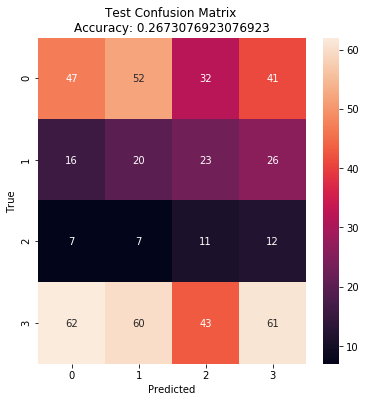

In [204]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

gb = GaussianNB().fit(X_tr, y_train)

gb_predictions_te = gb.predict(X_te) 
gb_predictions_tr = gb.predict(X_tr) 

cm_train = confusion_matrix(y_train, gb_predictions_tr)
cm_test = confusion_matrix(y_test, gb_predictions_te)

print('Confusion Matrix Train Data')
print(cm_train)
print('='*50)
print('Confusion Matrix Test Data')
print(cm_test)
print('='*50)
print('Train Accuracy: ',gb.score(X_tr,y_train))
print('Test Accuracy: ',gb.score(X_te,y_test))
print('='*50)

cm_te_df = pd.DataFrame(cm_test)

plt.figure(figsize =(6,6))
sns.heatmap(cm_te_df, annot=True)
plt.title('Test Confusion Matrix \nAccuracy: {}'.format(gb.score(X_te,y_test)))
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()
print()

## Decision Tree

Confusion Matrix Train Data
[[364   0   0 150]
 [  8   0   0 245]
 [  0   0   0 112]
 [  3   0   0 675]]
Confusion Matrix Test Data
[[131   0   0  41]
 [  2   0   0  83]
 [  0   0   0  37]
 [  1   0   0 225]]
Train Accuracy:  0.6673089274245344
Test Accuracy:  0.6846153846153846


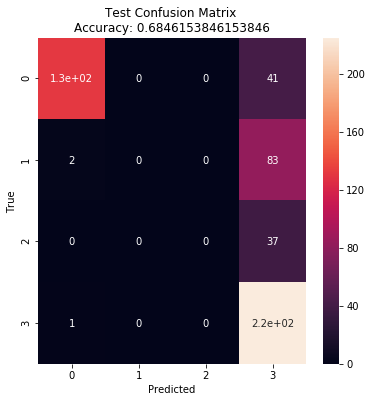

In [205]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_tr, y_train) 
dtree_predictions_tr = dtree_model.predict(X_tr) 
dtree_predictions_te = dtree_model.predict(X_te) 

cm_dt_tr = confusion_matrix(y_train, dtree_predictions_tr)
cm_dt_te = confusion_matrix(y_test, dtree_predictions_te)


print('Confusion Matrix Train Data')
print(cm_dt_tr)
print('='*50)
print('Confusion Matrix Test Data')
print(cm_dt_te )
print('='*50)
print('Train Accuracy: ',dtree_model.score(X_tr,y_train))
print('Test Accuracy: ',dtree_model.score(X_te,y_test))
print('='*50)

cm_te_df2 = pd.DataFrame(cm_dt_te)

plt.figure(figsize =(6,6))
sns.heatmap(cm_te_df2, annot=True)
plt.title('Test Confusion Matrix \nAccuracy: {}'.format(dtree_model.score(X_te,y_test)))
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()
print()

## SVM

Confusion Matrix Train Data
[[482   3   3  26]
 [ 12 181   4  56]
 [  0   5  96  11]
 [  8   6   5 659]]
Confusion Matrix Test Data
[[139   3   2  28]
 [ 12  15   9  49]
 [  2   2  19  14]
 [ 28  28  10 160]]
Train Accuracy:  0.9107257546563905
Test Accuracy:  0.6403846153846153


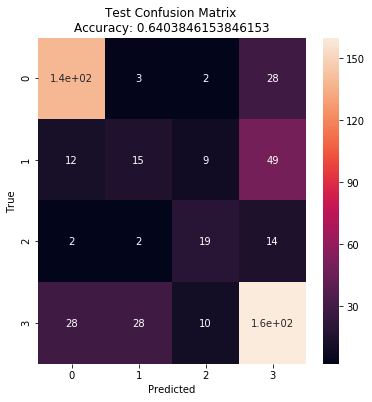

In [206]:
from sklearn.svm import SVC 
sv_model = SVC(kernel = 'linear', C = 1).fit(X_tr, y_train)
sv_predictions_tr = sv_model.predict(X_tr) 
sv_predictions_te = sv_model.predict(X_te) 

cm_sv_tr = confusion_matrix(y_train, sv_predictions_tr)
cm_sv_te = confusion_matrix(y_test, sv_predictions_te)


print('Confusion Matrix Train Data')
print(cm_sv_tr)
print('='*50)
print('Confusion Matrix Test Data')
print(cm_sv_te )
print('='*50)
print('Train Accuracy: ',sv_model.score(X_tr,y_train))
print('Test Accuracy: ',sv_model.score(X_te,y_test))
print('='*50)

cm_te_df3 = pd.DataFrame(cm_sv_te)

plt.figure(figsize =(6,6))
sns.heatmap(cm_te_df3, annot=True)
plt.title('Test Confusion Matrix \nAccuracy: {}'.format(sv_model.score(X_te,y_test)))
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()
print()

Confusion Matrix Train Data
[[424   2   3  85]
 [ 10  44  10 189]
 [  0   3  57  52]
 [ 15   1  11 651]]
Confusion Matrix Test Data
[[127   2   0  43]
 [  4   9   2  70]
 [  0   1  18  18]
 [  6   4  11 205]]
Train Accuracy:  0.7552986512524085
Test Accuracy:  0.6903846153846154


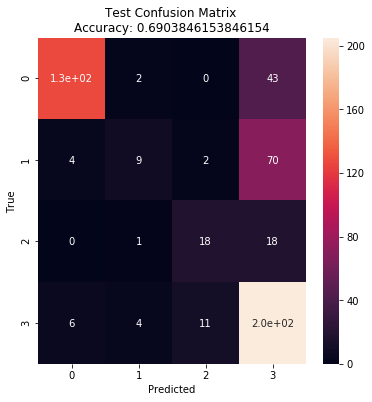

In [24]:
from xgboost import XGBClassifier
xg_model = XGBClassifier() 
xg_model.fit(X_tr, y_train)

xg_predictions_tr = xg_model.predict(X_tr) 
xg_predictions_te = xg_model.predict(X_te) 

cm_xg_tr = confusion_matrix(y_train, xg_predictions_tr)
cm_xg_te = confusion_matrix(y_test, xg_predictions_te)


print('Confusion Matrix Train Data')
print(cm_xg_tr)
print('='*50)
print('Confusion Matrix Test Data')
print(cm_xg_te )
print('='*50)
print('Train Accuracy: ',xg_model.score(X_tr,y_train))
print('Test Accuracy: ',xg_model.score(X_te,y_test))
print('='*50)

cm_te_df4 = pd.DataFrame(cm_xg_te)

plt.figure(figsize =(6,6))
sns.heatmap(cm_te_df4, annot=True)
plt.title('Test Confusion Matrix \nAccuracy: {}'.format(xg_model.score(X_te,y_test)))
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()
print()

In [25]:
from tabulate import tabulate
print(tabulate([['GaussianNB', 0.796, 0.267],['Decision Tree', 0.667 , 0.685],['SVM', 0.911, 0.640 ],['XGBoost', 0.755, 0.690 ]],
headers=['Model','AUC(Train)','AUC(Test)'], tablefmt='orgtbl'))

| Model         |   AUC(Train) |   AUC(Test) |
|---------------+--------------+-------------|
| GaussianNB    |        0.796 |       0.267 |
| Decision Tree |        0.667 |       0.685 |
| SVM           |        0.911 |       0.64  |
| XGBoost       |        0.755 |       0.69  |
